In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import layers
import tensorflow
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
#



In [2]:
print("Training data shape: ", X_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", X_test.shape)
print("Test labels shape: ", y_test.shape)

Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


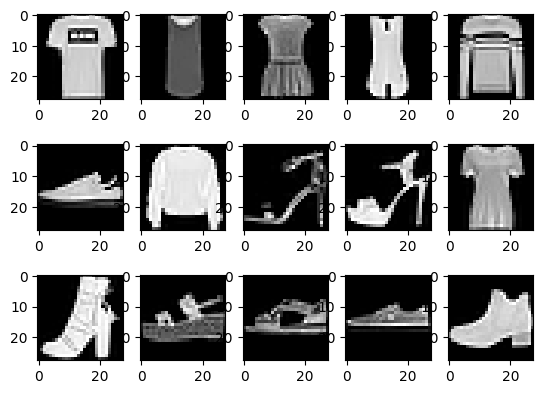

In [3]:
import matplotlib.pyplot as plt

for i in range(1, 16):
    
    plt.subplot(3, 5, i)

    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
 
# Display the entire plot
plt.show()

In [4]:


# Reshape the data to add a channel dimension for convolutional layers
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [5]:



X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [6]:

model = tensorflow.keras.Sequential([
  layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [7]:

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:




# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.4980 - accuracy: 0.8187 - val_loss: 0.3927 - val_accuracy: 0.8519
Epoch 2/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.3224 - accuracy: 0.8823 - val_loss: 0.3174 - val_accuracy: 0.8865
Epoch 3/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2765 - accuracy: 0.9000 - val_loss: 0.2896 - val_accuracy: 0.8959
Epoch 4/10
 224/1875 [==>...........................] - ETA: 41s - loss: 0.2512 - accuracy: 0.9104

In [ ]:
model.summary()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np


In [ ]:
y_pred =model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = y_test
acc = accuracy_score(Y_true,Y_pred_classes)
class_report = classification_report(Y_true,Y_pred_classes)



print('The accuracy: {}'.format(acc))
print('The Classification Report:\n {}'.format(class_report))

In [ ]:
import seaborn as sns
cm = confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize = (12,9))
sns.heatmap(cm, annot=True,cmap="Greens",linewidths=.5)
     